In [1]:
%matplotlib inline

<div class="document" id="adaptive-thresholding">
<h1 class="title">Adaptive Thresholding</h1>
<p>Thresholding is the simplest way to segment objects from a background. If that
background is relatively uniform, then you can use a global threshold value to
binarize the image by pixel-intensity. If there's large variation in the
background intensity, however, adaptive thresholding (a.k.a. local or dynamic
thresholding) may produce better results.</p>
<p>Here, we binarize an image using the <cite>threshold_adaptive</cite> function, which
calculates thresholds in regions of size <cite>block_size</cite> surrounding each pixel
(i.e. local neighborhoods). Each threshold value is the weighted mean of the
local neighborhood minus an offset value.</p>
</div>


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from skimage.filters import threshold_otsu, threshold_adaptive, gaussian_filter

from scipy import ndimage as ndi
from skimage.morphology import watershed, disk
from skimage.filters import sobel
from skimage.external.tifffile import TiffFile
   
path = r'c:\Users\M1SRH\Documents\Projects\Customer_Projects\Rare_Event_LaserDissection_Michael Graf\GFP_Mutant_EDF\GFP_WT_EDF'
filename = r'\GFP_WT_EDF_s16_ORG.tif'

with TiffFile(path + filename) as tif:
    image = tif.asarray()
    print image.shape

tif.close()

# check image min/max values
print image.max()
print image.min()

(500L, 500L)
16383
205


In [3]:
# filter the image
image = gaussian_filter(image, sigma=2)

In [4]:
global_thresh = threshold_otsu(image)
binary_global = image > global_thresh

block_size = 250
binary_adaptive = threshold_adaptive(image, block_size, offset=image.min()*0.1)

In [5]:
# fill holes
binary_global = ndi.binary_fill_holes(binary_global)
binary_adaptive = ndi.binary_fill_holes(binary_adaptive)

In [6]:
# remove too samll and too big objects
label_objects, nb_labels = ndi.label(binary_global)
label_objects_ad, nb_labels_ad = ndi.label(binary_adaptive)
sizes = np.bincount(label_objects.ravel())
sizes_ad = np.bincount(label_objects_ad.ravel())

mask_sizes = sizes > 20
mask_sizes = mask_sizes < 500
mask_sizes[0] = 0
cells_cleaned = mask_sizes[label_objects]

mask_sizes_ad = sizes_ad > 20
mask_sizes_ad = mask_sizes_ad < 500
mask_sizes_ad[0] = 0
cells_cleaned_ad = mask_sizes_ad[label_objects_ad]

AttributeError: 'numpy.ndarray' object has no attribute 'axis'

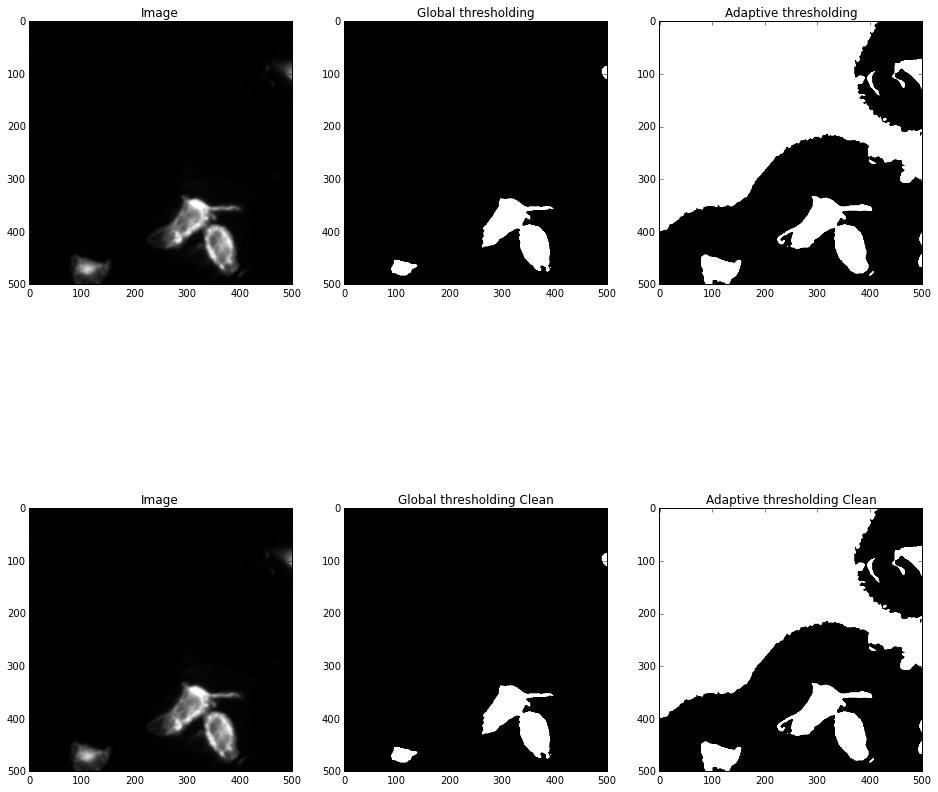

In [9]:
#fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(16, 16))
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 16))
#axes =  ((ax1, ax2, ax3), (ax4, ax5, ax6))
ax1, ax2, ax3, ax4, ax5, ax6 = axes
plt.gray()

ax1.imshow(image)
ax1.set_title('Image')

ax2.imshow(binary_global)
ax2.set_title('Global thresholding')

ax3.imshow(binary_adaptive)
ax3.set_title('Adaptive thresholding')

ax4.imshow(image)
ax4.set_title('Image')

ax5.imshow(cells_cleaned)
ax5.set_title('Global thresholding Clean')

ax6.imshow(cells_cleaned_ad)
ax6.set_title('Adaptive thresholding Clean')

for ax in axes:
    ax.axis('off')

plt.show()